# TP 4 : Classification

**Avant de commencer :** Merci de bien lire le préambule et l'énoncé de ce TP. Ça vous évitera de perdre beaucoup de temps ensuite. 

**Rendu :** Ce TP doit être déposé sur elearning. Le rendu doit contenir uniquement le fichier `.ipynb`. Le notebook doit être propre, le plus illustré et le plus commenté possible. 

**Librairies :** Ce TP repose sur les librairies standard suivantes : 
- Numpy version used: 1.23.1
- Matplotlib: 3.5.2
- Pandas version used: 1.4.3
- Scikit-learn version used: 1.1.1
- Scipy version used: 1.7.3

Pour vérifier qu'elles sont bien installées dans votre environnement de travail, lancez la cellule suivante. Elle ne doit pas renvoyer d'erreur (un `Warning` n'est en général pas trop embêtant). 

Pour les numéros _exacts_ de version, ce n'est pas très grave s'il y a une petite différence (par exemple `numpy 1.22` au lieu de `1.23`), mais si vous avez une trop grosse différence (par exemple `sklearn 0.23` au lieu de `sklearn 1.1`), mettez à jour votre librairie. 

S'il vous manque une librairie (`No module named ...`), vous pouvez l'installer 
- Soit en utilisant votre gestionnaire d'environnement (p.ex. `conda`). 
- Soit directement depuis le notebook, en faisant
```
!pip install nom_de_la_librairie==numero_de_la_version
```

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance_matrix
import pandas as pd

## Partie I : Modèle plus proche voisin et jeu DIGITS

Le jeu de données DIGITS est inspiré d'un grand classique (MNIST) des jeux de données « jouets » pour la classification. 

Il est constitué de 1797 observations (des images de nombres) décrits par les pixels qui le constituent sous la forme d'un tableau de longueur `64` (représentant une image `8 x 8` pixels), et réparties en 10 classes (les nombres de 0 à 9). 

On peut le télécharger très facilement grâce à l'API de `sklearn` via la fonction `load_digits()` dont la documentation est disponible [ici](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). <!-- L'option `as_frame=True` permet de formater certaines données en `pandas DataFrame`. -->

In [3]:
digits = datasets.load_digits()

In [4]:
np.unique(digits['target'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
digits['data'].shape

(1797, 64)

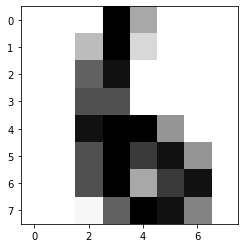

In [7]:
plt.imshow(digits['data'][156].reshape(8,8), cmap='Greys')

### Exploration

**Question 1:** Réalisez une phase exploratoire du dataset. Une fois encore, il s'agit d'une question libre ; n'hésitez pas à regarder le Chapitre 0 et le TP1 pour reprendre les bonnes habitudes sur l'exploration de jeux de données.

Commentez vos observations. 

In [ ]:
# Écrivez votre code ici

-- Écrivez vos commentaires ici. --

---

### Le modèle des plus proches voisins

Nous allons réaliser une tâche de classification avec ce dataset. L'importance (dans un premier temps) n'est pas d'avoir un modèle performant, mais d'appliquer une bonne méthodologie et de tirer des conclusions pertinentes. 

In [28]:
# Choisissez vos deux classes ici. Par exemple 3 et 8. 
classe1 = ...
classe2 = ...

**Question 2: Préparation du jeu de données.** Préparer votre jeu de données en le séparant en jeu d'entraînement et jeu de test, avec une proportion que vous aurez choisie. 

_Rappel:_ on peut utiliser la méthode `train_test_split` de scikit-learn. 

In [4]:
# Écrivez votre code ici. 

**Modèle de plus proche voisin.** On se propose ici de tester dans un premier temps un modèle de plus proche voisin, implémenté _à la main_ (rassurez-vous, rien de compliqué). Le principe de ce modèle est le suivant : 

- On prend un entier $k$
- Quand on a une observation de test $x$:
   - On détermine les $k$ points de l'ensemble de test les plus proches de $x$
   - On regarde le label le plus fréquent, c'est la prédiction $F(x)$ pour $x$ (en cas d'égalité, on choisira au hasard). 
   

**Question 3:** Implémenter le modèle de plus proche voisin. 

_Indications:_ 
- Comme vu au TP 2, on peut déterminer **toutes** les distances entre une listes de nouvelles images `new_obs` et la liste de "référence" `x_train` via la fonctoin `distance_matrix` de `scipy` (importée en début de TP). 
- Pour trouver les **indices** des `k` plus petites entrées de chaque **lignes** d'une matrice `A`, on peut faire `np.argsort(A, axis=1)[:,:k]`. Voir exemple dans la cellule de code ci-dessous. 

In [12]:
A = np.random.randn(10, 5)  # on fabrique une matrice aléatoire de taille 10 x 5
print("La matrice aléatoire :\n", A)   # on l'affiche

Z = np.argsort(A, axis=1)[:,:3]  # on applique la fonction donneé. 

print("\nIndices des entrées minimales : \n", Z)  # on affiche les indices des plus petites entrées. 
          # Par exemple, la première ligne de Z signifie "les 3 plus proches entrées de la première ligne de A ont pour indice [machin, truc, bidule]" 
          # (rappel : en Python, la numérotation commence à 0). 

La matrice aléatoire :
 [[-0.84686054 -0.43349187  0.04452494 -0.22352379  0.51145679]
 [ 1.21714977  0.27334228 -1.45788026 -1.24438783 -1.02769072]
 [-0.47861495 -1.1740434  -0.14488874 -0.11989289 -0.34286534]
 [-0.17324286  0.00861853  0.25308976 -1.24653749  1.60835969]
 [-0.10154838 -0.58893895 -0.12206315  0.34254074  1.87773971]
 [-2.24971645 -0.81811888 -0.7584066  -0.76259011 -0.11545674]
 [-0.24115697  0.58254868  0.84244988 -0.44445306  0.67512415]
 [ 0.09075909 -1.29909002  0.9940223   0.31963538  1.7339379 ]
 [ 0.84300787  0.35768345  0.52637406  0.32188733 -1.02777344]
 [-0.3425063  -1.05720324 -0.31531566 -0.14875794  2.08917646]]

Indices des entrées minimales : 
 [[0 1 3]
 [2 3 4]
 [1 0 4]
 [3 0 1]
 [1 2 0]
 [0 1 3]
 [3 0 1]
 [1 0 3]
 [4 3 1]
 [1 0 2]]


In [5]:
def classifieur_plus_proche_voisin(x_test, k, x_train, y_train):
    """
    :param x_test: une liste d'observations (taille N x 64) sur lesquelles ont va faire des prédictions. 
    :param k: hyper-paramètre du modèle, le nombre de voisin à considérer
    :param x_train: le jeu de données de référence. 
    :param y_train: les labels correspondants
    
    :return: une liste y_pred de la même longueur que new_obs, qui indique pour chaque observation de new_obs le label prédit par votre méthode. 
    """
    ... # A COMPLETER

---

**Question 4:** Ce modèle est-il paramétrique ? A-t-il besoin de phase d'entraînement ?

-- Écrivez votre réponse ici --

---

 Pour évaluer la performance de votre modèle sur un nouveau jeu de données `x_test` avec pour labels `y_test`, on va simplement compter le nombre de bonnes prédictions faites. 

**Question 5:** Implémenter la méthode `accuracy(y_pred, y_test)` qui prend en entrée une liste label prédits (typiquement la sortie de `classifieur_plus_proche_voisin`) et les vrais labels `y_test`, et qui renvoie **la proportion** de réponses correctes, c'est-à-dire

$$\frac{\text{nombre de bonnes reponses}}{\text{nombre de donnees dans xtest}}$$

_Remarque:_ On peut aussi multiplier cette proportion par 100 pour avoir un pourcentage. 

In [ ]:
def accuracy(y_pred, y_test):
    ... # A COMPLETER

---

**Question 6:** Évaluez la performance de votre méthode `classifieur_plus_proche_voisin` en prenant le jeu d'entraînement `x_train` comme "nouvelles observations" (et comme observations de références)---c'est-à-dire prendre `x_test=x_train` et `x_train=x_train`, en utilisant le paramètre `k=1`. Que remarquez vous ?

In [13]:
# Écrivez votre code ici

-- Écrivez votre commentaire ici --

----

**Question 7:** Évaluer la performance de votre modèle  pour différentes de valeurs de `k` (on testera **au moins** `k=1`, `k=5`, et `k=500`). Commentez le rôle du paramètre `k`. 

In [15]:
# Écrivez votre code ici

-- Écrivez vos commentaires ici --

# Partie 2 : Classification avec Sklearn

On va maintenant travailler avec le jeu de données "Wine" de `sklearn` qui représente 3 types de vins (rouge, blanc, rosé ? je n'ai pas trouvé l'info sur [la doc](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset)) ; chaque vin étant représenté par 13 attributs. 

In [16]:
df_wine_x, df_wine_y = datasets.load_wine(return_X_y=True, as_frame=True)  # version pandas
X, y = datasets.load_wine(return_X_y=True)  # version numpy pour sklearn

In [17]:
df_wine_x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


**Question 1:** Mettez en place une méthodologie de classification avec `sklearn`. Vous choisirez un modèle de classification parmi ceux fournis [ici](https://scikit-learn.org/stable/supervised_learning.html) : vous pouvez prendre ceux indiquant "classifier" dans leur nom, ou la _logistic regression_ qui, malgré son nom, est bien une méthode de classification. 

Cette question est ouverte et vous devez avancer en autonomie. L'objectif **n'est pas** d'avoir une bonne performance à la fin, mais d'appliquer la méthodologie correctement, et de tirer les conclusions perinentes. Vous pouvez très bien conclure "mon modèle _overfit_ complètement avec les paramètres que j'ai choisi, il est nul." ; tant que c'est bien fait, c'est ok. 